In [1]:
from data import *
import pandas as pd 
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.sparse import csgraph
from sklearn import neighbors
plt.rcParams["figure.figsize"] = (40,6)


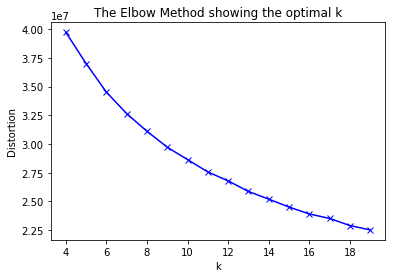

In [3]:
train_data = new_data[["acne","backache","bloating","cramp","dizzy","headache","mood","sore"]].values
train_truth = new_data[["user_id","stage"]].values
Sum_of_squared_distances = []
K = range(4,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Total points
10708
Number of points in each cluster
719 [26.14325452 62.8581363  65.62586926 77.2433936  28.49095967 61.02225313
 76.3310153  52.6689847 ]
752 [ 8.27925532 15.49202128 10.8125     18.57180851 12.81382979 68.63962766
 14.96276596  7.0412234 ]
854 [14.55269321 18.24824356 71.6030445  31.43442623  7.32903981 15.60421546
 13.87002342 12.90866511]
912 [16.05921053 70.40570175 27.00548246 65.47807018  9.60307018 19.24561404
 14.375      13.39254386]
916 [12.72052402 15.28275109 20.65502183 14.59716157  4.72161572 10.72925764
 21.6430131  70.3209607 ]
1124 [15.02664298 15.81527531 21.64031972 22.44671403  6.6634103  13.53818828
 76.22113677  9.1634103 ]
1174 [ 5.62436116  7.0528109  10.28620102 66.75638842  3.41737649  6.18143101
  7.70783646  5.4846678 ]
4257 [6.58354877 4.94289072 3.6613396  4.32361927 1.62091657 2.69588719
 3.68437133 2.97156287]


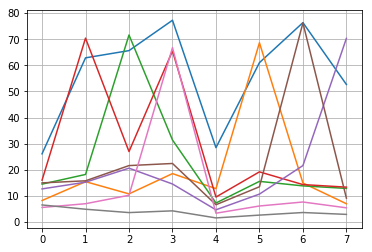

In [4]:
train_data = new_data[["acne","backache","bloating","cramp","dizzy","headache","mood","sore"]].values
train_truth = new_data[["user_id","stage"]].values
kmeans = KMeans(n_clusters=8, random_state=0).fit(train_data)

# !! Get the indices of the points for each corresponding cluster
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform the dictionary into list
dictlist = []
for key, value in mydict.items():
    dictlist.append(len(value))
    
print("Total points")
print(len(train_data))

print("Number of points in each cluster")
arr = []
for i in range(len(dictlist)):
    arr.append([int(dictlist[i]),kmeans.cluster_centers_[i]])
arr = sorted(arr,key=lambda x: x[0])
for i in arr:
    print (str(i[0]) + " " + str(i[1]))
    plt.plot(i[1])

plt.grid()

In [5]:
sorted(new_data["cycle_length_initial"].unique())

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

C:\Users\mr_sq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5.486542443064182


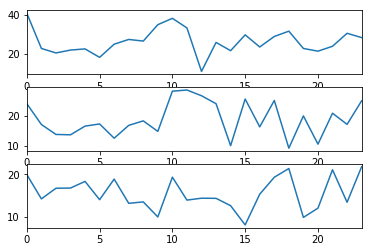

In [9]:
i = 25
filter_data = new_data.loc[new_data.cycle_length_initial==i]
filter_data["nstage"] = np.floor(filter_data['stage'] * i)
transformed_data = filter_data.groupby(['nstage'], as_index=False).mean()

fig, axs = plt.subplots(3,1)

transformed_data['cramp'].plot(ax=axs[0])
transformed_data['mood'].plot(ax=axs[1])
transformed_data['bloating'].plot(ax=axs[2])

print(new_data[new_data.cycle_length_initial==i]["period_length_initial"].mean())
plt.show()

C:\Users\mr_sq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5.698347107438017


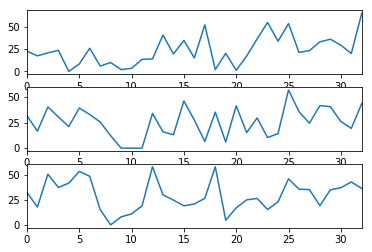

In [7]:
i = 35
filter_data = new_data.loc[new_data.cycle_length_initial==i]
filter_data["nstage"] = np.floor(filter_data['stage'] * i)
transformed_data = filter_data.groupby(['nstage'], as_index=False).mean()

fig, axs = plt.subplots(3,1)

transformed_data['cramp'].plot(ax=axs[0])
transformed_data['mood'].plot(ax=axs[1])
transformed_data['bloating'].plot(ax=axs[2])


print(new_data[new_data.cycle_length_initial==i]["period_length_initial"].mean())
plt.show()